<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (569, 30)
Number of malignant samples: 212
Number of benign samples: 357

Feature statistics:
                               mean         min         max
mean radius               14.127292    6.981000    28.11000
mean texture              19.289649    9.710000    39.28000
mean perimeter            91.969033   43.790000   188.50000
mean area                654.889104  143.500000  2501.00000
mean smoothness            0.096360    0.052630     0.16340
mean compactness           0.104341    0.019380     0.34540
mean concavity             0.088799    0.000000     0.42680
mean concave points        0.048919    0.000000     0.20120
mean symmetry              0.181162    0.106000     0.30400
mean fractal dimension     0.062798    0.049960     0.09744
radius error               0.405172    0.111500     2.87300
texture error              1.216853    0.360200     4.88500
perimeter error            2.866059    0.757000    21.98000
area error                40.337079    6.802000   5

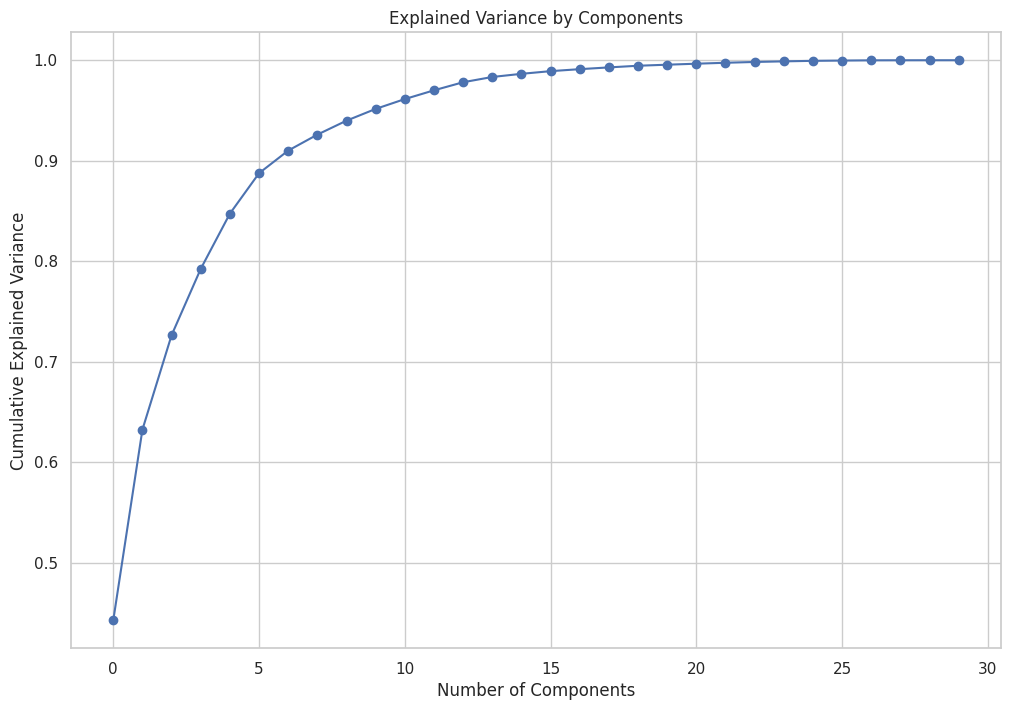

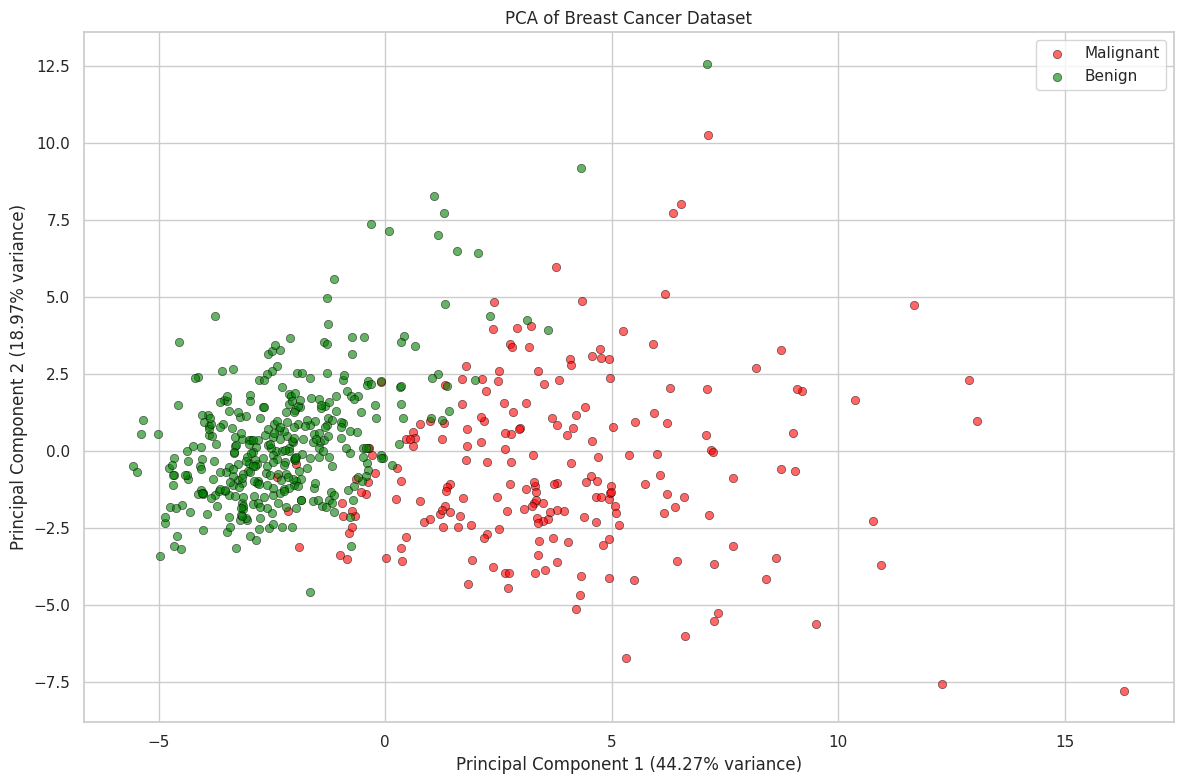

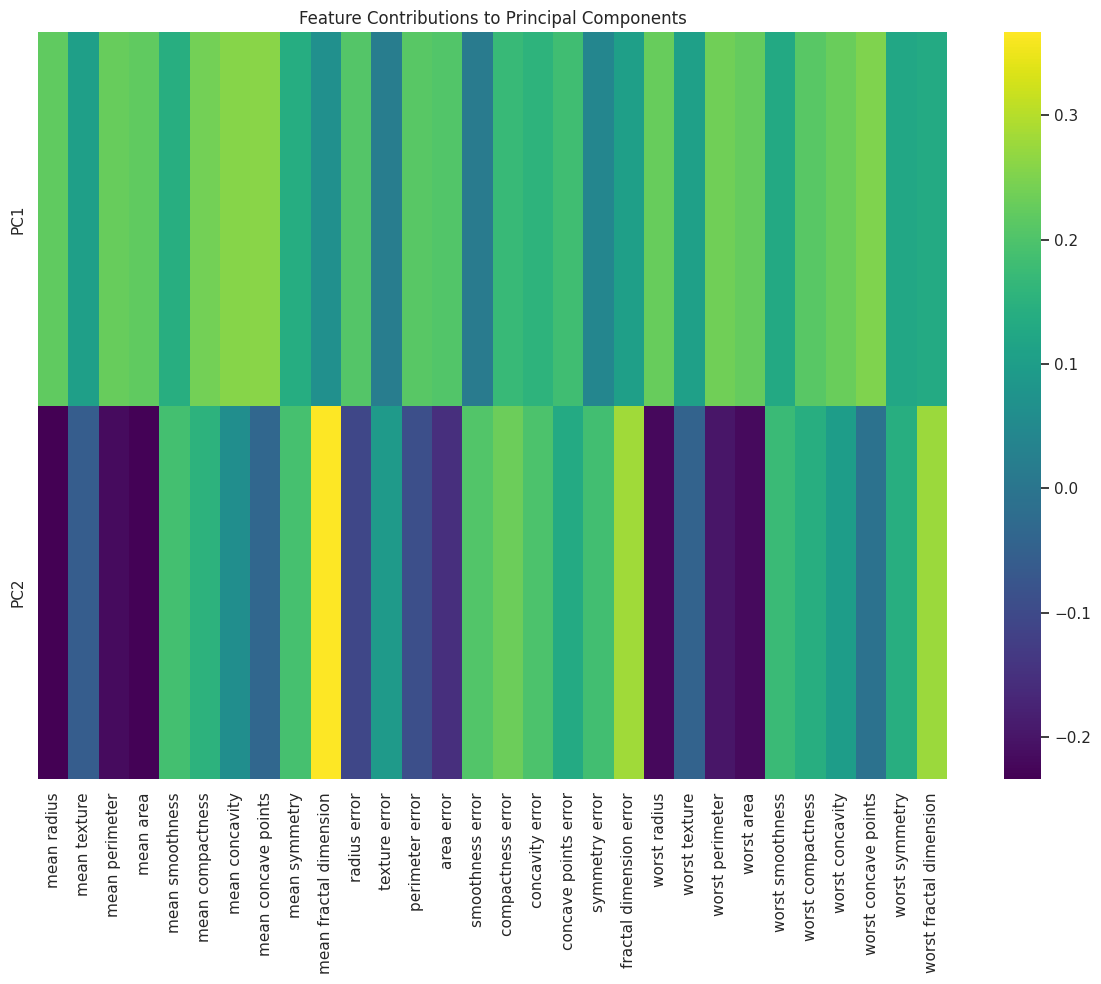


Number of components needed for 95% variance: 10

Model performance with original data:
Accuracy: 0.9708

Model performance with PCA data:
Accuracy: 0.9591


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set style for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Basic dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of malignant samples: {sum(y == 0)}")
print(f"Number of benign samples: {sum(y == 1)}")
print("\nFeature statistics:")
print(X.describe().T[['mean', 'min', 'max']])

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio
print("\nExplained variance ratio for the first two components:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f} or {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Visualize explained variance for all components
plt.figure()
plt.plot(np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_), 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Visualize data in 2D after PCA
plt.figure()
classes = ['Malignant', 'Benign']
colors = ['red', 'green']
target_names = {0: 'Malignant', 1: 'Benign'}

for i, color in zip(np.unique(y), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, alpha=0.6, edgecolor='black', linewidth=0.5,
                label=classes[i])

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Breast Cancer Dataset')
plt.legend()
plt.tight_layout()
plt.show()

# Feature contribution to principal components
pca_components = pd.DataFrame(
    pca.components_,
    columns=cancer.feature_names,
    index=['PC1', 'PC2']
)

plt.figure(figsize=(12, 10))
sns.heatmap(pca_components, cmap='viridis', annot=False)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.show()

# Model performance comparison (with and without PCA)
# Original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

# PCA data
pca_all = PCA(n_components=0.95)  # Retain 95% of variance
X_pca_all = pca_all.fit_transform(X_scaled)
print(f"\nNumber of components needed for 95% variance: {X_pca_all.shape[1]}")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_all, y, test_size=0.3, random_state=42)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)

print("\nModel performance with original data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.4f}")
print("\nModel performance with PCA data:")
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_pca):.4f}")

